<a href="https://colab.research.google.com/github/Shristi1104/EMPLOYEE_SALARY/blob/main/employee_salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv('employee_salary.csv')

In [3]:
print("Data Overview:")
print(df.head())
print("\nData Description:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())

Data Overview:
   Age  Experience    Education             Job Title       Location  \
0   32           5     Bachelor         HR Specialist         Austin   
1   45          12       Master        Data Scientist       New York   
2   28           3     Bachelor     Software Engineer  San Francisco   
3   39           8          PhD       Product Manager        Chicago   
4   51          22  High School  Sales Representative         Remote   

   Programming Skills  Management Experience Company Size     Salary  
0                   0                      0       Medium   52341.28  
1                   1                      1        Large  148729.45  
2                   1                      0        Small   98456.12  
3                   0                      1        Large  142387.90  
4                   0                      0       Medium   45218.76  

Data Description:
             Age  Experience  Programming Skills  Management Experience  \
count  20.000000   20.000000    

In [4]:
df['Seniority'] = pd.cut(df['Experience'],
                         bins=[-1, 3, 7, 15, 30],
                         labels=['Junior', 'Mid-level', 'Senior', 'Executive'])
df['Tech_Role'] = df['Job Title'].apply(lambda x: 1 if x in ['Data Scientist', 'Software Engineer'] else 0)
df['Salary_Experience_Ratio'] = df['Salary'] / (df['Experience'] + 1)
education_map = {'High School': 1, 'Bachelor': 2, 'Master': 3, 'PhD': 4}
df['Education_Level'] = df['Education'].map(education_map)

In [5]:
plt.figure(figsize=(15, 12))

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

Text(0.5, 1.0, 'Salary Distribution')

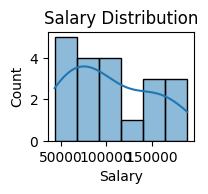

In [6]:
plt.subplot(3, 3, 1)
sns.histplot(df['Salary'], kde=True)
plt.title('Salary Distribution')

Text(0.5, 1.0, 'Salary by Job Title')

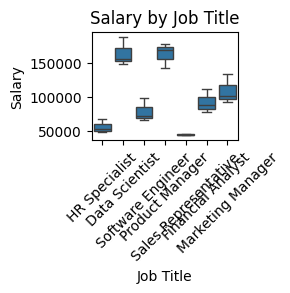

In [7]:
plt.subplot(3, 3, 2)
sns.boxplot(x='Job Title', y='Salary', data=df)
plt.xticks(rotation=45)
plt.title('Salary by Job Title')

Text(0.5, 1.0, 'Salary by Education Level')

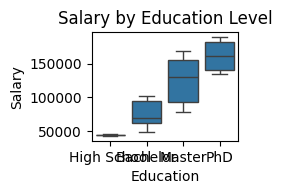

In [8]:
plt.subplot(3, 3, 3)
sns.boxplot(x='Education', y='Salary', data=df, order=['High School', 'Bachelor', 'Master', 'PhD'])
plt.title('Salary by Education Level')

Text(0.5, 1.0, 'Salary by Location')

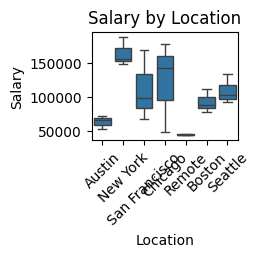

In [9]:
plt.subplot(3, 3, 4)
sns.boxplot(x='Location', y='Salary', data=df)
plt.xticks(rotation=45)
plt.title('Salary by Location')

Text(0.5, 1.0, 'Salary by Company Size')

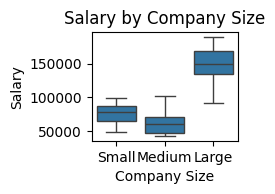

In [10]:
plt.subplot(3, 3, 5)
sns.boxplot(x='Company Size', y='Salary', data=df, order=['Small', 'Medium', 'Large'])
plt.title('Salary by Company Size')

Text(0.5, 1.0, 'Experience vs Salary')

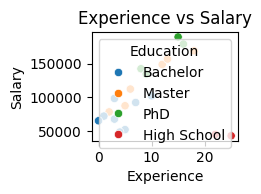

In [11]:
plt.subplot(3, 3, 6)
sns.scatterplot(x='Experience', y='Salary', hue='Education', data=df)
plt.title('Experience vs Salary')

Text(0.5, 1.0, 'Age vs Salary')

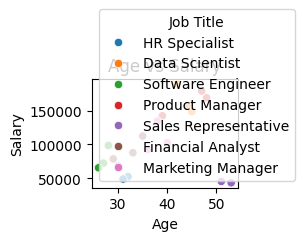

In [12]:
plt.subplot(3, 3, 7)
sns.scatterplot(x='Age', y='Salary', hue='Job Title', data=df)
plt.title('Age vs Salary')

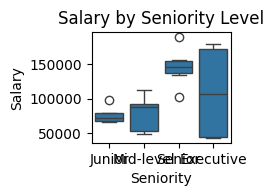

In [13]:
plt.subplot(3, 3, 8)
sns.boxplot(x='Seniority', y='Salary', data=df, order=['Junior', 'Mid-level', 'Senior', 'Executive'])
plt.title('Salary by Seniority Level')

plt.tight_layout()
plt.show()

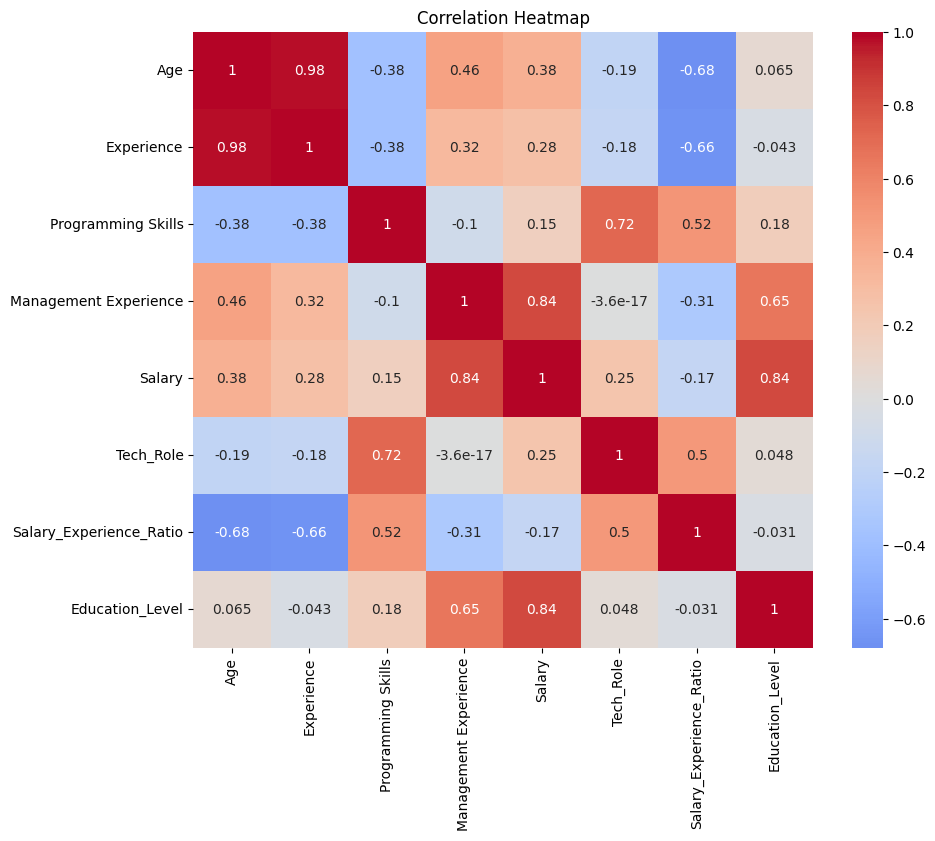

In [14]:
plt.figure(figsize=(10, 8))
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [15]:
features = ['Age', 'Experience', 'Education', 'Job Title', 'Location',
            'Programming Skills', 'Management Experience', 'Company Size',
            'Seniority', 'Tech_Role', 'Education_Level']
X = df[features]
y = df['Salary']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
categorical_cols = ['Education', 'Job Title', 'Location', 'Company Size', 'Seniority']
numeric_cols = ['Age', 'Experience', 'Programming Skills', 'Management Experience',
                'Tech_Role', 'Education_Level']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)])

In [18]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Age', 'Experience',
                                                   'Programming Skills',
                                                   'Management Experience',
                                                   'Tech_Role',
                                                   'Education_Level']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Education', 'Job Title',
                                                   'Location', 'Company Size',
                                                   'Seniority'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [19]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Performance:")
print(f"Mean Absolute Error: ${mae:,.2f}")
print(f"R-squared: {r2:.3f}")


Model Performance:
Mean Absolute Error: $7,965.37
R-squared: 0.961


In [20]:
cat_encoder = model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']
cat_features = cat_encoder.get_feature_names_out(categorical_cols)
all_features = numeric_cols + list(cat_features)

In [21]:
rf = model.named_steps['regressor']
importances = rf.feature_importances_

In [22]:
feature_importance = pd.DataFrame({'Feature': all_features, 'Importance': importances})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

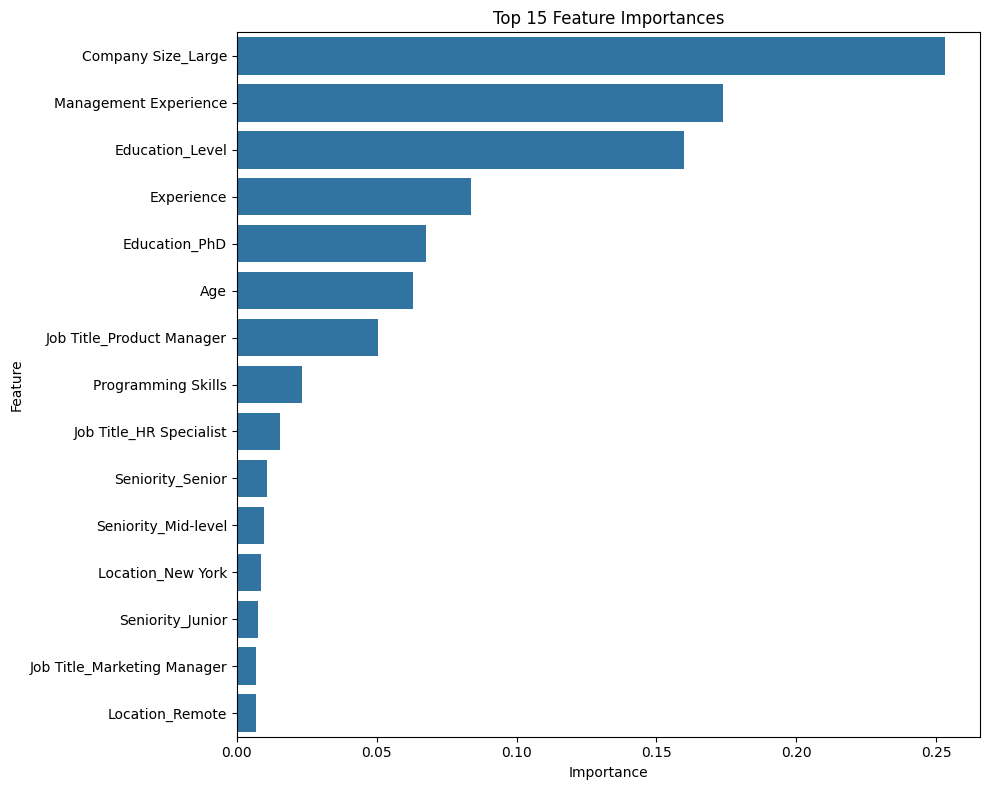

In [23]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
plt.title('Top 15 Feature Importances')
plt.tight_layout()
plt.show()

In [24]:
example_employee = pd.DataFrame({
    'Age': [35],
    'Experience': [8],
    'Education': ['Master'],
    'Job Title': ['Data Scientist'],
    'Location': ['New York'],
    'Programming Skills': [1],
    'Management Experience': [1],
    'Company Size': ['Large'],
    'Seniority': ['Senior'],
    'Tech_Role': [1],
    'Education_Level': [3]
})

predicted_salary = model.predict(example_employee)
print(f"\nExample Prediction for Data Scientist in New York:")
print(f"Predicted Salary: ${predicted_salary[0]:,.2f}")


Example Prediction for Data Scientist in New York:
Predicted Salary: $124,450.15
